Author Name: Johan Winarwan Nawawi [33222600023]

Neural Network Case Study: Digit Recognition

### Import Required Libraries

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from importlib import reload
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

### Read and Display Dataset Digit

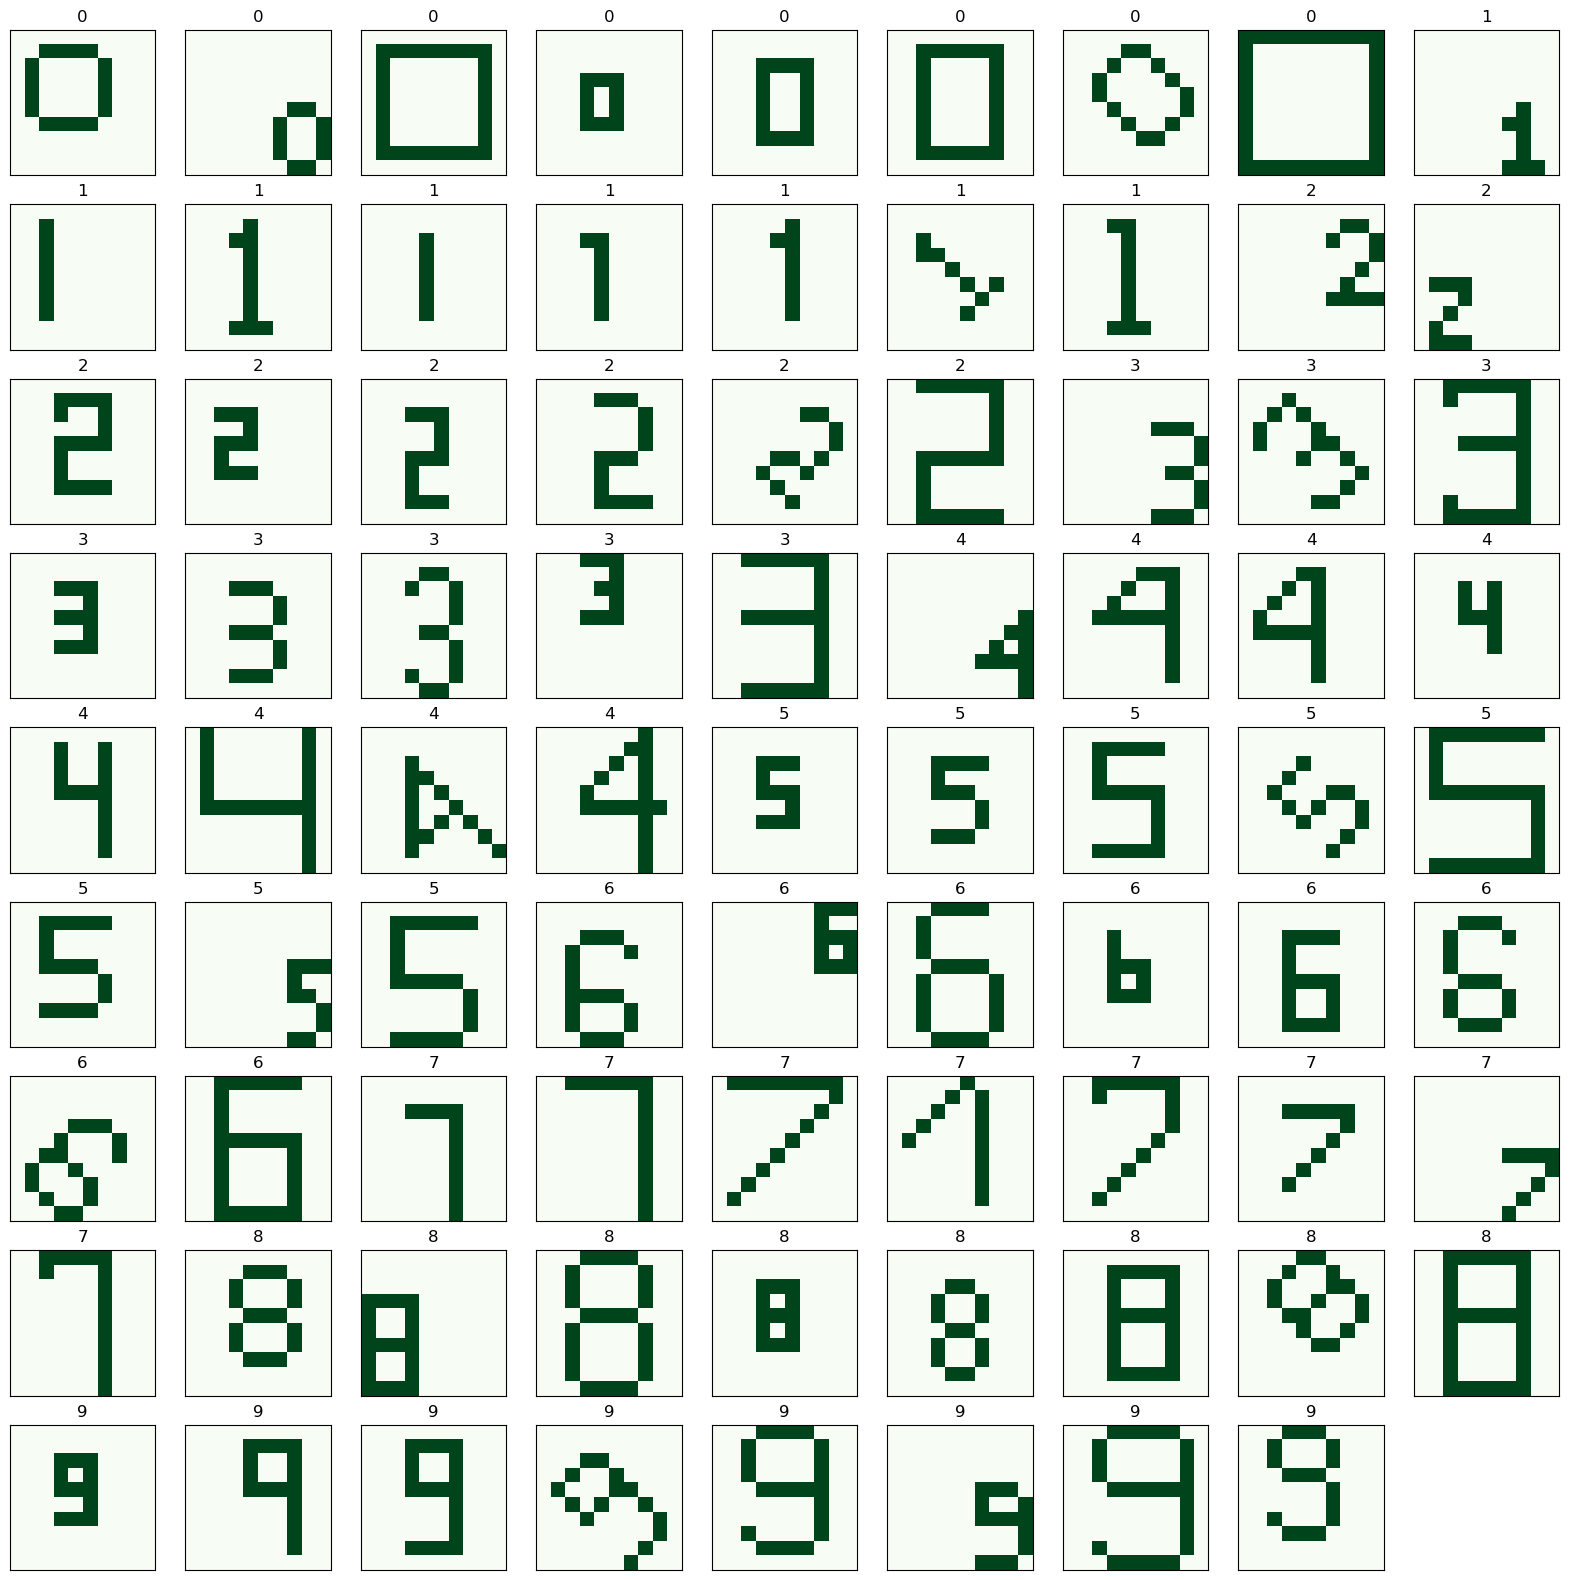

In [2]:
dataset = pd.read_csv('../Data/digit.csv')
data = dataset.iloc[:, 0:-1]
label = dataset.iloc[:, -1]

numbers_to_display = 80
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20, 20))
for i in range(numbers_to_display):
    ax = plt.subplot(num_cells, num_cells, i + 1)
    im = ax.imshow(data.iloc[i].values.reshape(10, 10), cmap='Greens')
    plt.xlabel = ''
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.title(label.iloc[i])

### Multilayer Perceptron with Various Activation Functions - Loss Curve Analysis

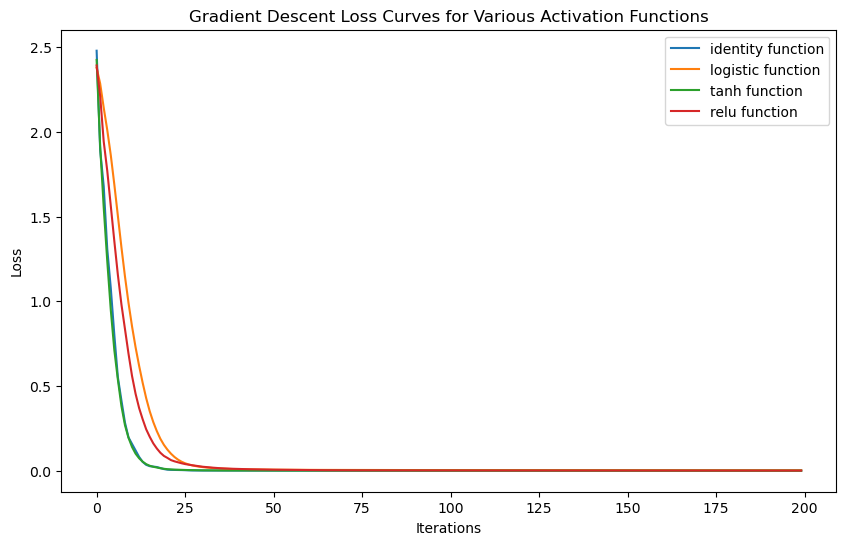

In [3]:
# gradient descent visualization
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

plt.figure(figsize=(10, 6))
for activation_function in activation_functions:
    model = MLP(tol=0, hidden_layer_sizes = (15,), activation = activation_function,
                learning_rate_init = 0.1, random_state = 42)
    model.fit(data, label)
    pred = model.predict(data)
    plt.plot(model.loss_curve_, label = f'{activation_function} function')

plt.gca().set_xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curves for Various Activation Functions')
plt.legend()
plt.show()

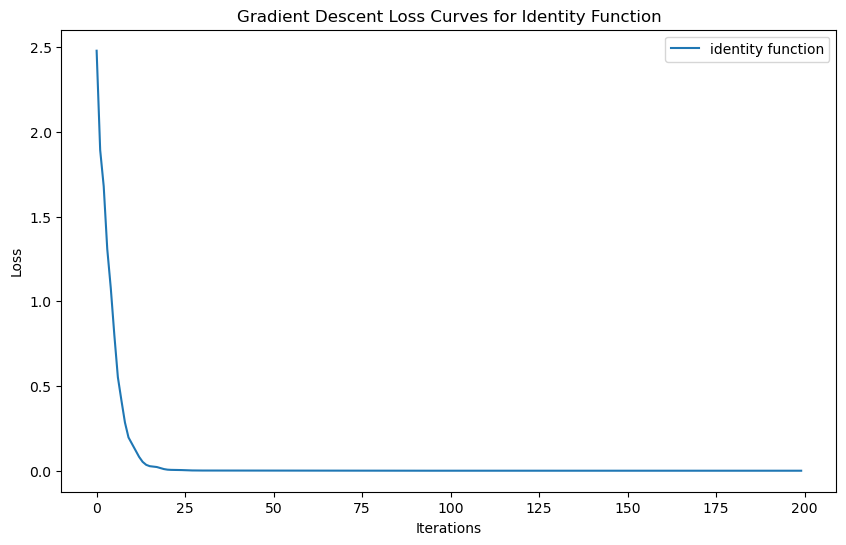

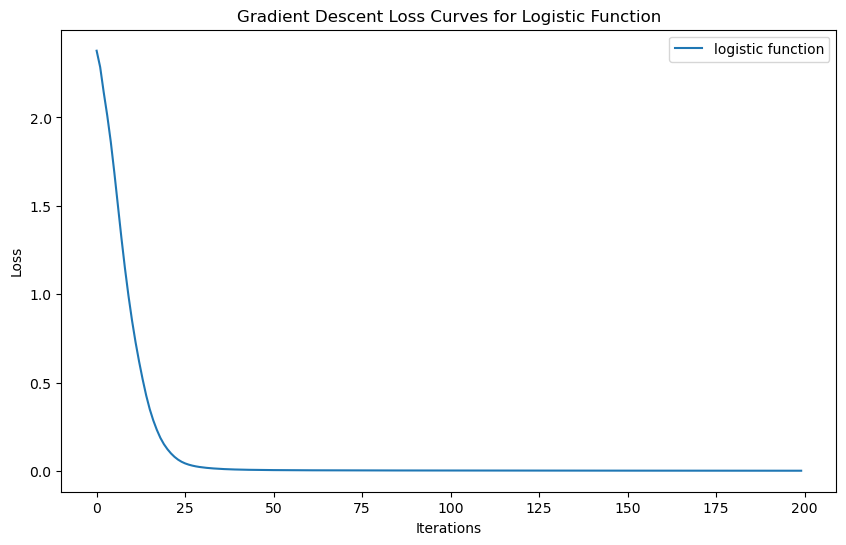

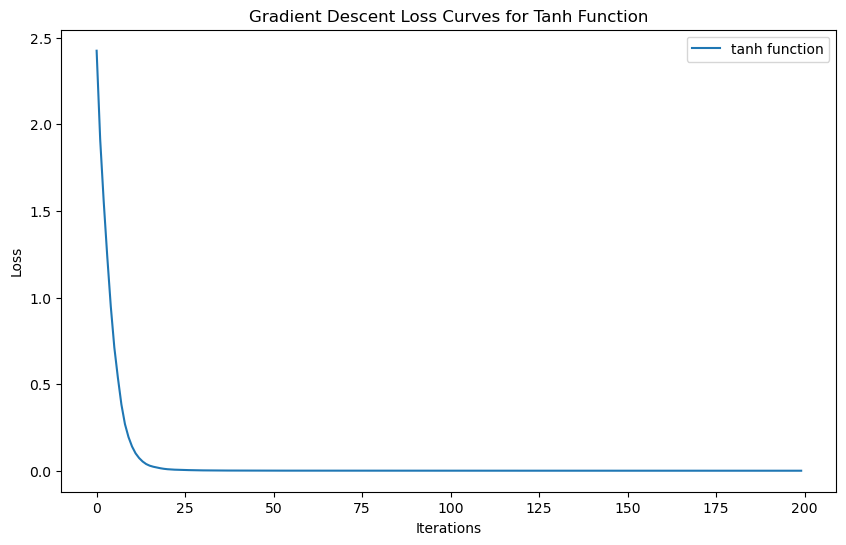

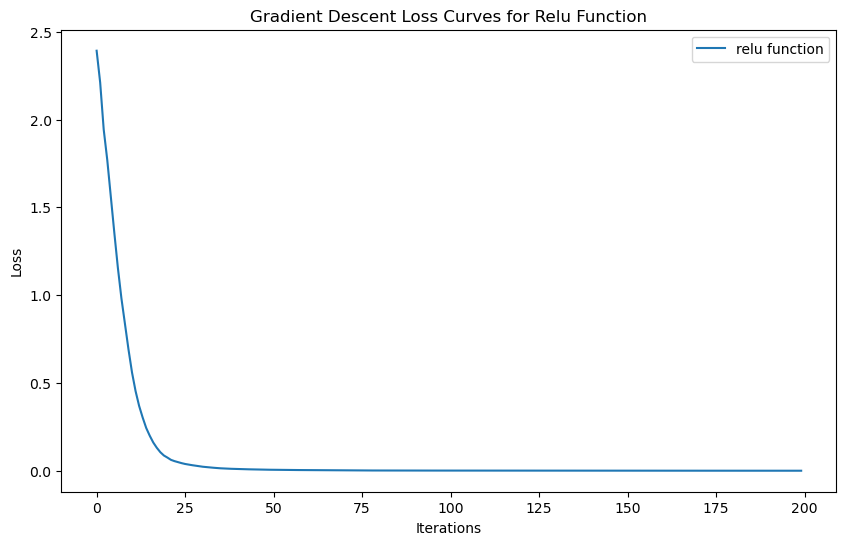

In [4]:
# gradient descent visualization - detail
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

for activation_function in activation_functions:
    model = MLP(tol=0, hidden_layer_sizes = (15,), activation = activation_function,
                learning_rate_init = 0.1, random_state = 42)
    model.fit(data, label)
    pred = model.predict(data)

    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_, label = f'{activation_function} function')
    plt.gca().set_xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Gradient Descent Loss Curves for {activation_function.title()} Function')
    plt.legend()
    plt.show()

### Multilayer Perceptron with Various Hidden Layer Sizes
#### Commercial Neural Network Software -> ```m = 2/3(n + k)``` -> ```n = 100```, ```k = 10```, ```m = 2/3(110) = 73,3 = 73```
#### ``` m > 10```, take score out of ```73```, ```m <= 2n (Swingler, 1996)```

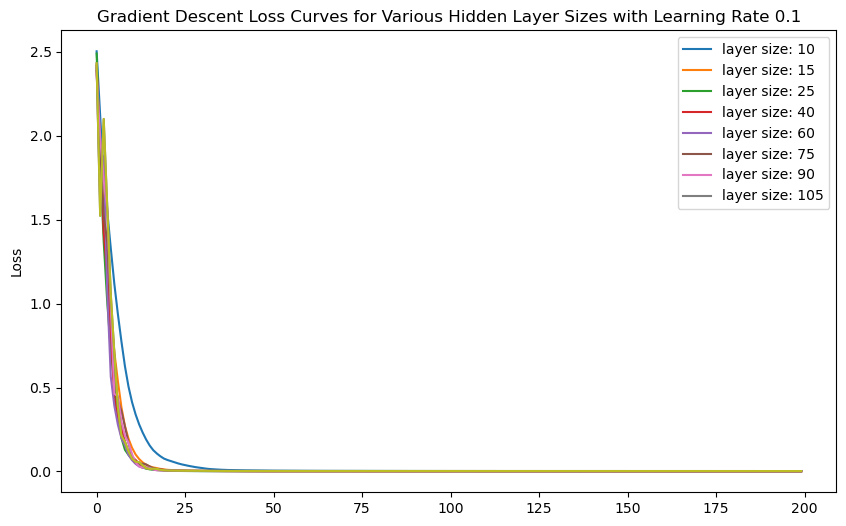

In [5]:
# gradient descent visualization - various hidden layer sizes
hidden_layers = [10, 15, 25, 40, 60, 75, 90, 105]

plt.figure(figsize=(10, 6))
for layer_size in hidden_layers:
    model = MLP(tol=0, hidden_layer_sizes = (layer_size,), activation = 'tanh',
                learning_rate_init = 0.1, random_state = 42)
    model.fit(data, label)
    pred = model.predict(data)
    plt.plot(model.loss_curve_, label = f'layer size: {layer_size}')

plt.plot(model.loss_curve_)
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curves for Various Hidden Layer Sizes with Learning Rate 0.1')
plt.legend()
plt.show()

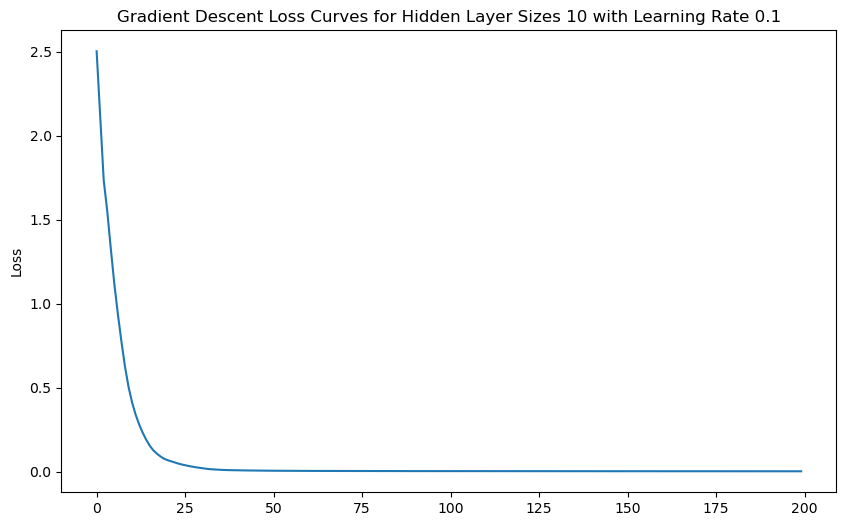

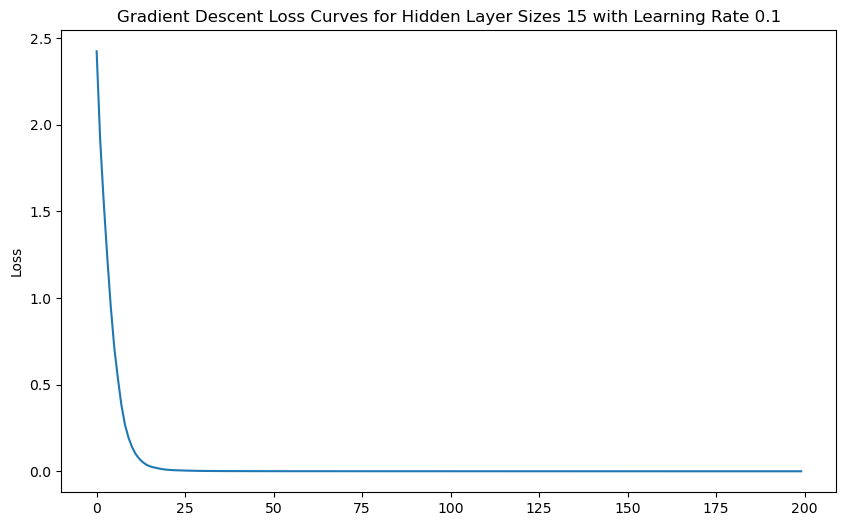

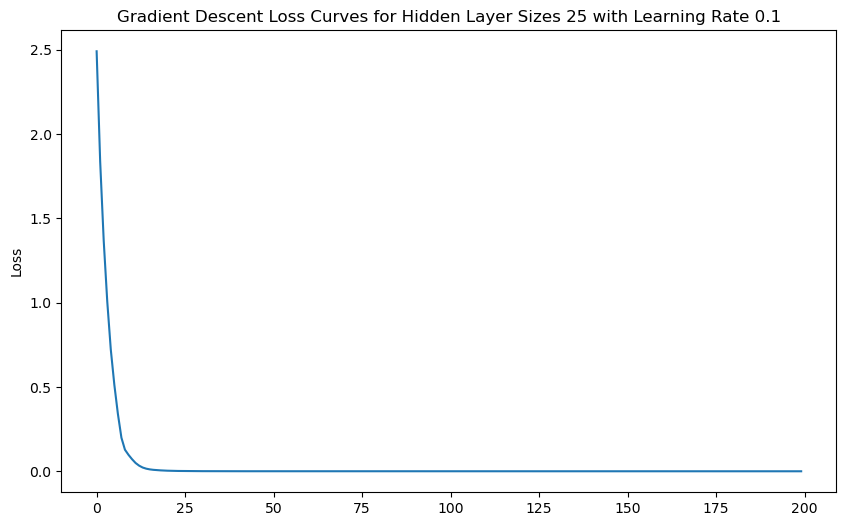

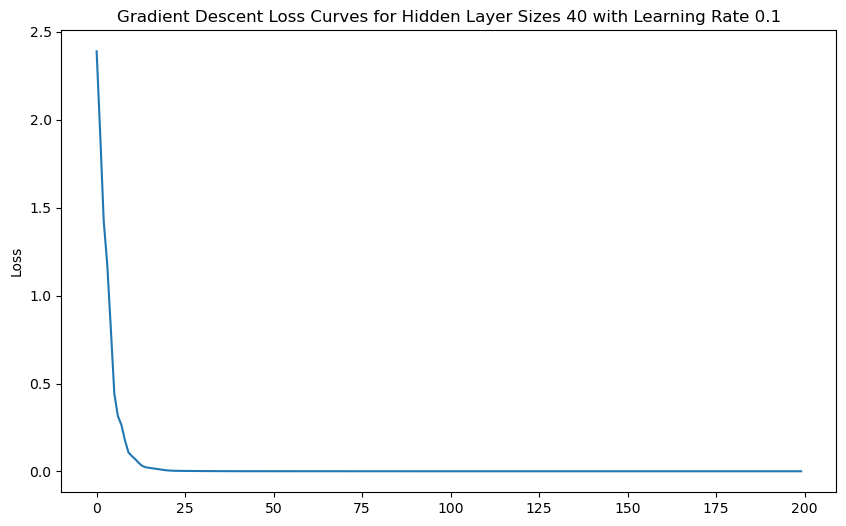

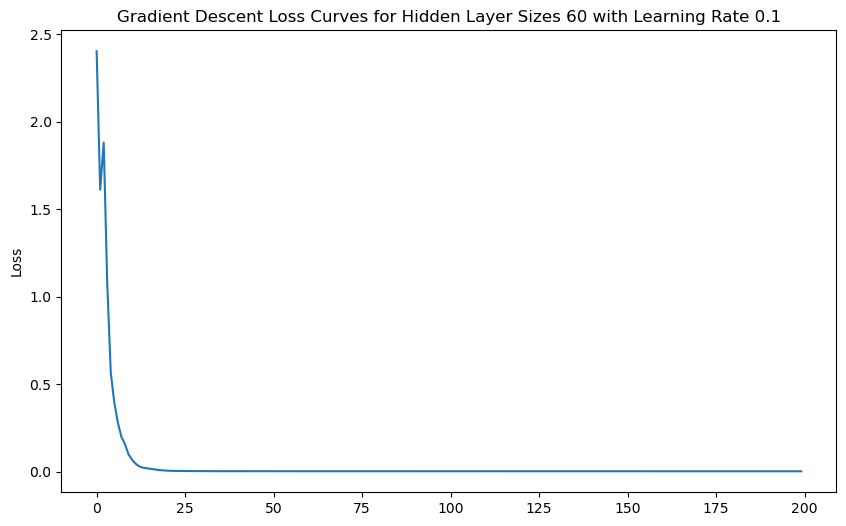

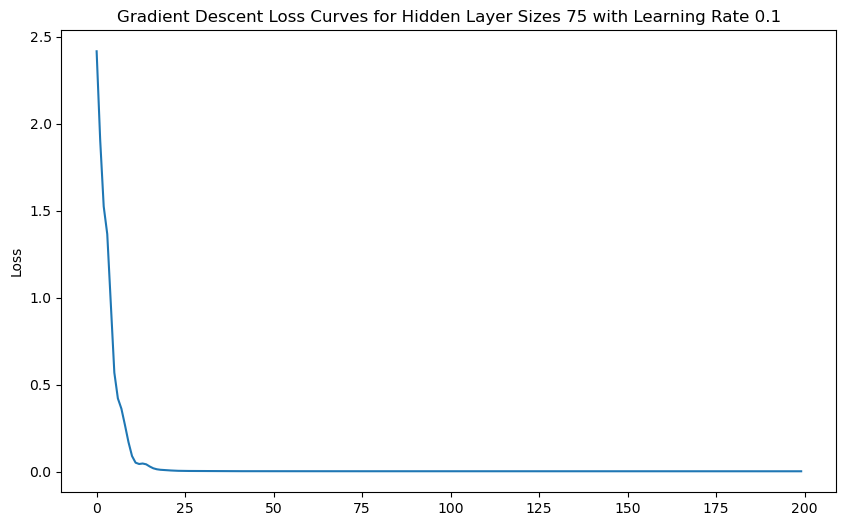

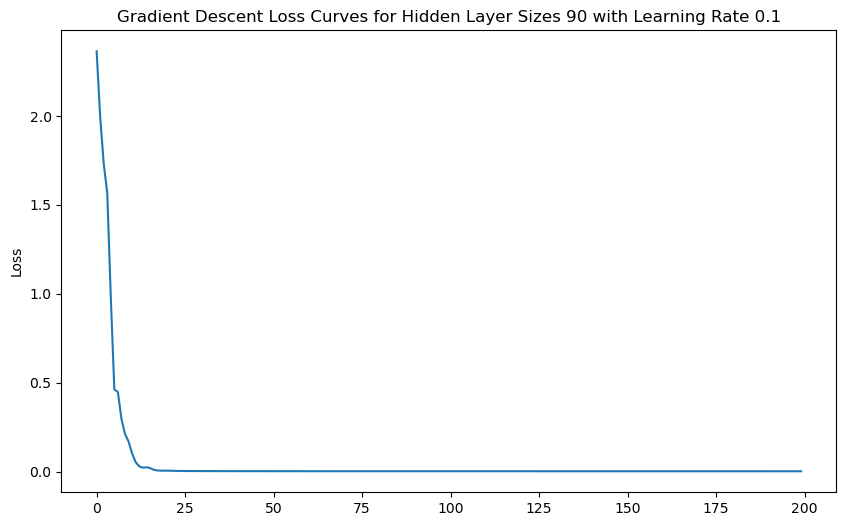

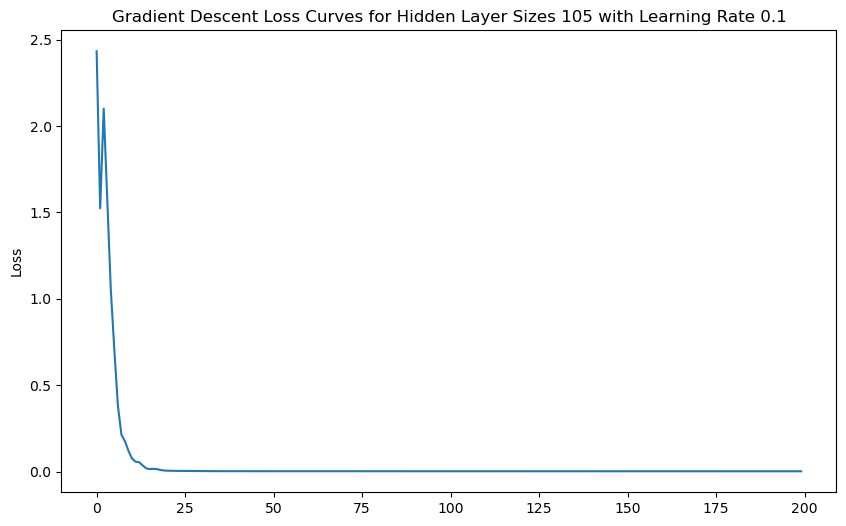

In [6]:
# gradient descent visualization - detail
hidden_layers = [10, 15, 25, 40, 60, 75, 90, 105]

for layer_size in hidden_layers:
    model = MLP(tol=0, hidden_layer_sizes = (layer_size,), activation = 'tanh',
                learning_rate_init = 0.1, random_state = 42)
    model.fit(data, label)
    pred = model.predict(data)

    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.ylabel('Loss')
    plt.title(f'Gradient Descent Loss Curves for Hidden Layer Sizes {layer_size} with Learning Rate 0.1')
    plt.show()

### Multilayer Perceptron with Various Learning Rates

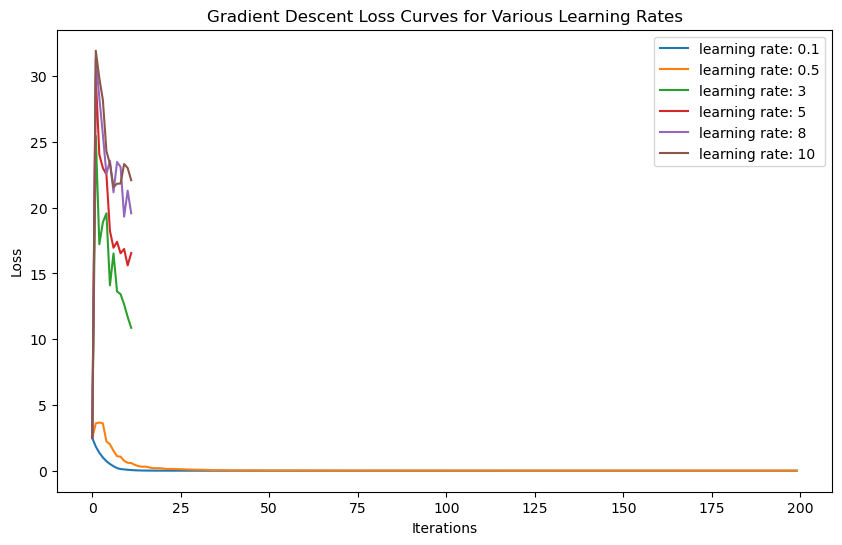

In [11]:
# gradient descent visualization
learning_rates = [0.1, 0.5, 3, 5, 8, 10]

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    model = MLP(tol=0, hidden_layer_sizes=(25,), activation='tanh',
                learning_rate_init=lr, random_state=42)
    model.fit(data, label)
    pred = model.predict(data)
    plt.plot(model.loss_curve_, label=f'learning rate: {lr}')

plt.gca().set_xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curves for Various Learning Rates')
plt.legend()
plt.show()

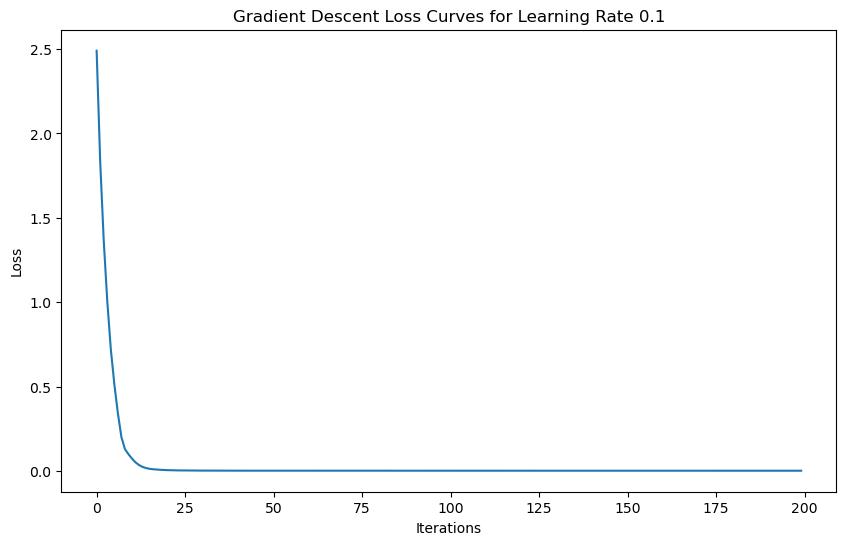

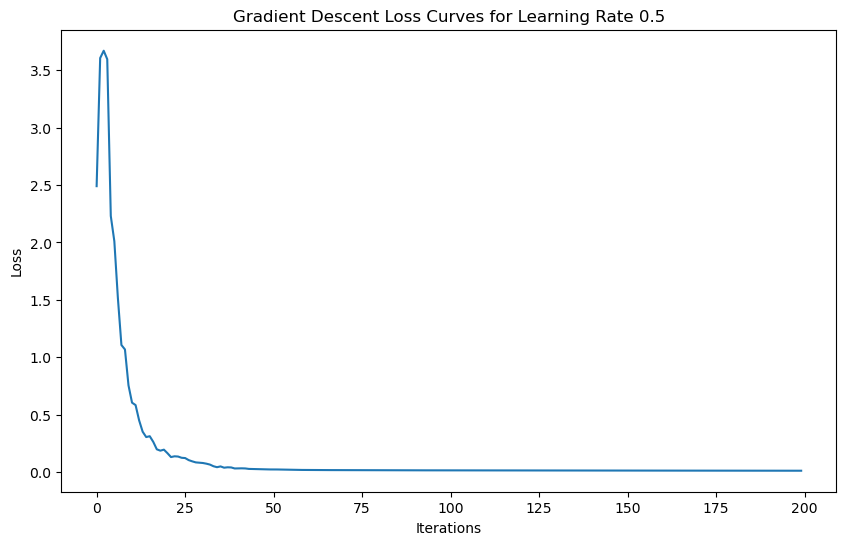

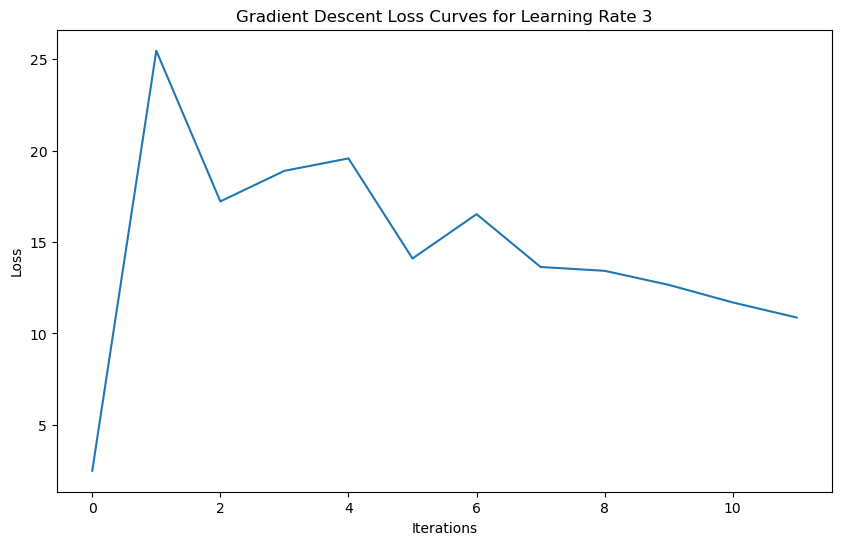

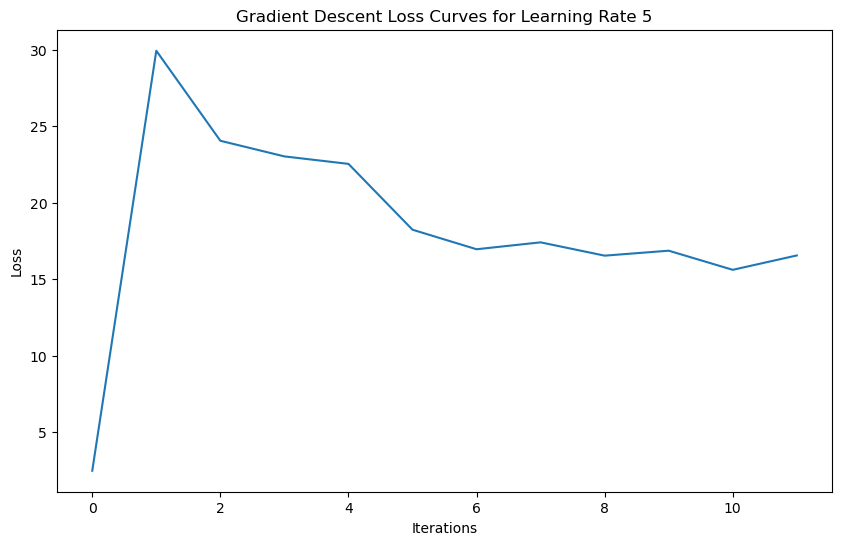

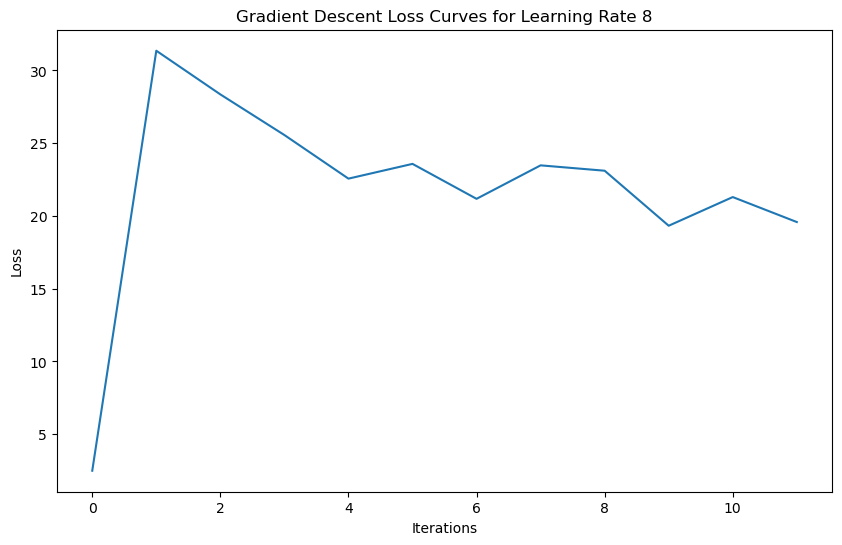

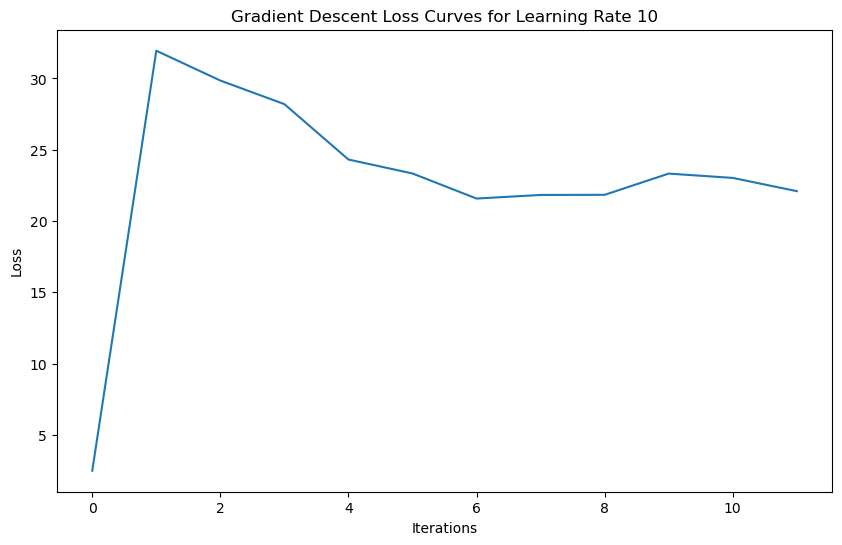

In [12]:
# gradient descent visualization - detail
learning_rates = [0.1, 0.5, 3, 5, 8, 10]

for lr in learning_rates:
    model = MLP(tol=0, hidden_layer_sizes=(25,), activation='tanh',
                learning_rate_init=lr, random_state=42)
    model.fit(data, label)
    pred = model.predict(data)

    plt.figure(figsize=(10, 6))
    plt.plot(model.loss_curve_)
    plt.gca().set_xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Gradient Descent Loss Curves for Learning Rate {lr}')
    plt.show()

### MLP Model with Optimal Parameter - Activation Function ```tanh``` - Hidden Layer Size ```15```, Learning Rate ```0.1```

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

model = MLP(tol=0, hidden_layer_sizes = (25,), activation = 'tanh',
            learning_rate_init = 0.1, random_state = 42)
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

accuracy_train = accuracy_score(y_train, train_predictions)
accuracy_test = accuracy_score(y_test, test_predictions)
error_train = 1 - accuracy_train
error_test = 1 - accuracy_test

print("train error rate:", error_train)
print("test error rate\t:", round(error_test, 2))

print("\nclassification report:\n", classification_report(y_test, test_predictions))

train error rate: 0.0
test error rate	: 0.69

classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       0.50      0.50      0.50         2
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         2
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         0

    accuracy                           0.31        16
   macro avg       0.28      0.31      0.29        16
weighted avg       0.31      0.31      0.30        16



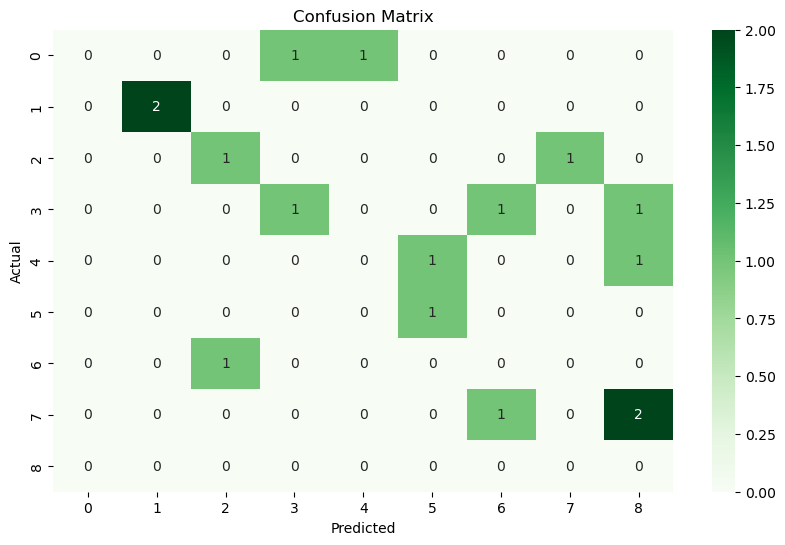

In [14]:
conf_matrix = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Greens')
plt.title('Confusion Matrix')
plt.gca().set_xlabel('Predicted')
plt.ylabel('Actual')
plt.show()